In [129]:
import pandas as pd
import numpy as np

# Load the data

In [130]:
fake = pd.read_csv('archive/Fake.csv')
real = pd.read_csv('archive/True.csv')

Assign labels

In [131]:
fake['label'] = 1
real['label'] = 0

Concatenate and shuffle

In [132]:
data = pd.concat([real, fake])
data = data.sample(frac=1).reset_index(drop=True)

# Preprocessing the data

Plot balance of labels

/home/anja/Projects/tdt13-project/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


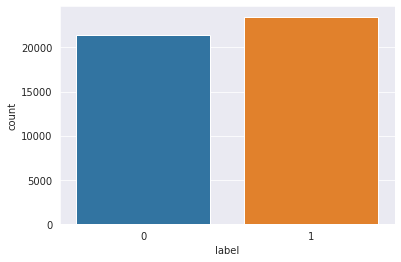

In [133]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(data['label']);

Find null values

In [134]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Plot subject distribution

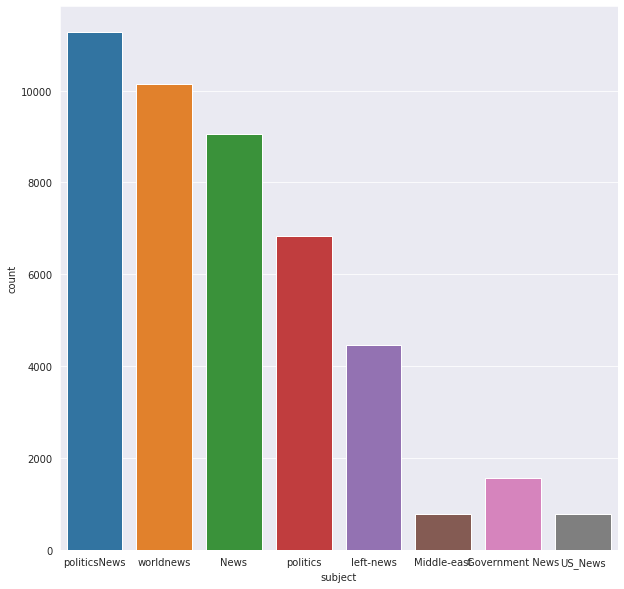

In [135]:
import matplotlib.pyplot as plt
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.countplot(x=data['subject']);

There are 8 different news subjects, where political news are the most frequent.

[Text(0, 0, '0'), Text(1, 0, '1')]

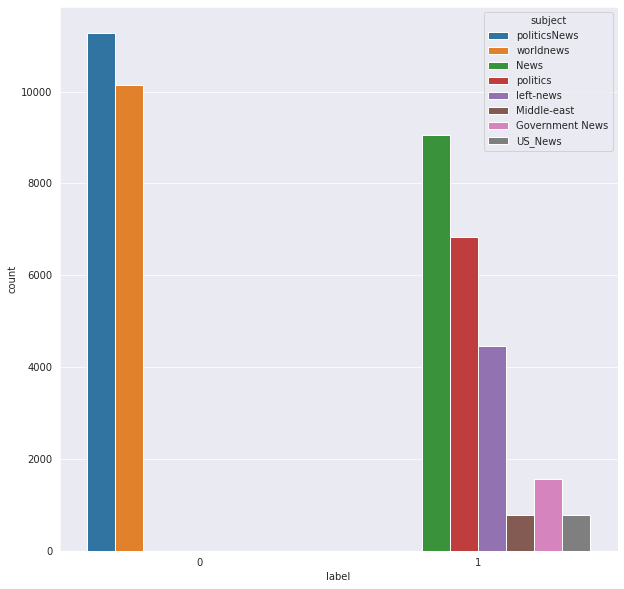

In [136]:
plt.figure(figsize = (10,10))
chart = sns.countplot(x = "label", hue = "subject" , data = data)
chart.set_xticklabels(chart.get_xticklabels())

All the real news stories belong to solely two subjects

# Natural language processing

In [137]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/anja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Combine title and text

In [138]:
data['all_words'] = data[['title', 'text']].apply(lambda x: ' '.join(x), axis=1)

Convert to lowercase, remove punctuation and tokenize

In [139]:
import string

punct = string.punctuation + '“”‘’'

def clean(article):
    lowercase = article.lower()
    punctuation = "".join([char for char in lowercase if char not in punct])
    tokens = nltk.word_tokenize(punctuation)
    return tokens

Remove stop words and digits

In [140]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# We want to keep the word "not" because it can affect the sentiment of the text
stop_words.remove('not')
digits = [str(x) for x in range(10)]

def remove_stop_words_and_digits(tokens):
    filtered = [word for word in tokens if (word not in stop_words and word not in digits)]
    return filtered

Define NLP pre_processing function

In [141]:
def pre_process(x):
    c = clean(x)
    f = remove_stop_words_and_digits(c)
    return f

In [142]:
data['cleaned'] = data['all_words'].apply(pre_process)
data

,title,text,subject,date,label,all_words,cleaned
0,U.S. Senate Democratic leader attacks Trump's ...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 17, 2017",0,U.S. Senate Democratic leader attacks Trump's ...,"[us, senate, democratic, leader, attacks, trum..."
1,Trump summit with Mexico's Pena Nieto still on...,"MEXICO CITY, (Reuters) - A summit between U.S....",politicsNews,"January 26, 2017",0,Trump summit with Mexico's Pena Nieto still on...,"[trump, summit, mexicos, pena, nieto, still, m..."
2,Judge raises doubts over suit against Trump on...,NEW YORK (Reuters) - A federal judge in New Yo...,politicsNews,"October 18, 2017",0,Judge raises doubts over suit against Trump on...,"[judge, raises, doubts, suit, trump, foreign, ..."
3,"Putin, Merkel hold phone call after German pol...",MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"September 26, 2017",0,"Putin, Merkel hold phone call after German pol...","[putin, merkel, hold, phone, call, german, pol..."
4,Supreme Court lets Trump's latest travel ban g...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"December 4, 2017",0,Supreme Court lets Trump's latest travel ban g...,"[supreme, court, lets, trumps, latest, travel,..."
...,...,...,...,...,...,...,...
44893,Denuclearization of Korean Peninsula is U.S. p...,WASHINGTON (Reuters) - U.S. policy is to achie...,politicsNews,"October 25, 2016",0,Denuclearization of Korean Peninsula is U.S. p...,"[denuclearization, korean, peninsula, us, poli..."
44894,Watch As The Right Changes History Before You...,The announcement that Harriet Tubman would rep...,News,"April 21, 2016",1,Watch As The Right Changes History Before You...,"[watch, right, changes, history, eyes, tubman,..."
44895,"U.S., Russia in extradition tug-of-war over bi...",ATHENS (Reuters) - A Greek court on Wednesday ...,worldnews,"October 11, 2017",0,"U.S., Russia in extradition tug-of-war over bi...","[us, russia, extradition, tugofwar, bitcoin, f..."
44896,MESSAGE TO HOLLYWOOD GOES VIRAL,This is the best yet! A message to Hollywood t...,politics,"Oct 17, 2017",1,MESSAGE TO HOLLYWOOD GOES VIRAL This is the be...,"[message, hollywood, goes, viral, best, yet, m..."


# Analyze word frequencies

In [143]:
from nltk import FreqDist, ngrams
import itertools

fake_words = data[data['label'] == 1].cleaned.tolist()
flattened_fake = list(itertools.chain(*fake_words))
freq_fake = FreqDist(flattened_fake)

In [144]:
freq_fake.most_common(20)

[('trump', 80633),
 ('not', 47776),
 ('said', 31199),
 ('president', 26570),
 ('people', 26422),
 ('would', 23672),
 ('one', 23446),
 ('us', 23046),
 ('obama', 19565),
 ('clinton', 18921),
 ('like', 17971),
 ('donald', 17940),
 ('video', 16109),
 ('hillary', 15277),
 ('also', 15247),
 ('new', 15028),
 ('news', 14959),
 ('even', 13836),
 ('white', 13604),
 ('time', 12953)]

In [145]:
real_words = data[data['label'] == 0].cleaned.tolist()
flattened_real = list(itertools.chain(*real_words))
freq_real = FreqDist(flattened_real)

In [146]:
freq_real.most_common(20)

[('said', 99053),
 ('trump', 47331),
 ('us', 45170),
 ('not', 38442),
 ('would', 31750),
 ('reuters', 28464),
 ('president', 26011),
 ('state', 19371),
 ('government', 18386),
 ('house', 17843),
 ('states', 17817),
 ('new', 17661),
 ('also', 15963),
 ('republican', 15923),
 ('united', 15622),
 ('people', 15207),
 ('told', 14285),
 ('could', 13933),
 ('one', 12788),
 ('last', 12690)]

# Sentiment analysis

In [147]:
from nltk.corpus import sentiwordnet as swn

To perform sentiment analysis, we must first perform Part of Speech tagging on the words in the corpus, and make them compatible with SentiWordNet

In [148]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [149]:
def pos_tag(x):
    p_t = nltk.pos_tag(x)
    swn_t = list(map(lambda word: (word[0], get_wordnet_pos(word[1])), p_t))
    return swn_t

In [150]:
data['tagged'] = data['cleaned'].apply(pos_tag)
data

,title,text,subject,date,label,all_words,cleaned,tagged
0,U.S. Senate Democratic leader attacks Trump's ...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 17, 2017",0,U.S. Senate Democratic leader attacks Trump's ...,"[us, senate, democratic, leader, attacks, trum...","[(us, n), (senate, v), (democratic, a), (leade..."
1,Trump summit with Mexico's Pena Nieto still on...,"MEXICO CITY, (Reuters) - A summit between U.S....",politicsNews,"January 26, 2017",0,Trump summit with Mexico's Pena Nieto still on...,"[trump, summit, mexicos, pena, nieto, still, m...","[(trump, a), (summit, n), (mexicos, n), (pena,..."
2,Judge raises doubts over suit against Trump on...,NEW YORK (Reuters) - A federal judge in New Yo...,politicsNews,"October 18, 2017",0,Judge raises doubts over suit against Trump on...,"[judge, raises, doubts, suit, trump, foreign, ...","[(judge, n), (raises, v), (doubts, n), (suit, ..."
3,"Putin, Merkel hold phone call after German pol...",MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"September 26, 2017",0,"Putin, Merkel hold phone call after German pol...","[putin, merkel, hold, phone, call, german, pol...","[(putin, n), (merkel, n), (hold, v), (phone, n..."
4,Supreme Court lets Trump's latest travel ban g...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"December 4, 2017",0,Supreme Court lets Trump's latest travel ban g...,"[supreme, court, lets, trumps, latest, travel,...","[(supreme, a), (court, n), (lets, v), (trumps,..."
...,...,...,...,...,...,...,...,...
44893,Denuclearization of Korean Peninsula is U.S. p...,WASHINGTON (Reuters) - U.S. policy is to achie...,politicsNews,"October 25, 2016",0,Denuclearization of Korean Peninsula is U.S. p...,"[denuclearization, korean, peninsula, us, poli...","[(denuclearization, n), (korean, a), (peninsul..."
44894,Watch As The Right Changes History Before You...,The announcement that Harriet Tubman would rep...,News,"April 21, 2016",1,Watch As The Right Changes History Before You...,"[watch, right, changes, history, eyes, tubman,...","[(watch, n), (right, n), (changes, n), (histor..."
44895,"U.S., Russia in extradition tug-of-war over bi...",ATHENS (Reuters) - A Greek court on Wednesday ...,worldnews,"October 11, 2017",0,"U.S., Russia in extradition tug-of-war over bi...","[us, russia, extradition, tugofwar, bitcoin, f...","[(us, n), (russia, v), (extradition, a), (tugo..."
44896,MESSAGE TO HOLLYWOOD GOES VIRAL,This is the best yet! A message to Hollywood t...,politics,"Oct 17, 2017",1,MESSAGE TO HOLLYWOOD GOES VIRAL This is the be...,"[message, hollywood, goes, viral, best, yet, m...","[(message, n), (hollywood, n), (goes, v), (vir..."


Use these to calculate the score of each document

In [151]:
def calc_score(doc):
    pos_score = 0
    neg_score = 0
    obj_score = 0
    word_count = len(doc)
    for word in doc:
        s = list(swn.senti_synsets(word[0], word[1]))
        if not s:
            continue
        pos_score += s[0].pos_score()
        neg_score += s[0].neg_score()
        obj_score += s[0].obj_score()
    if word_count:
        pos, neg, obj = pos_score/word_count, neg_score/word_count, obj_score/word_count
    else:
        pos, neg, obj = 0, 0, 0
    return pd.Series([pos, neg, obj])

In [152]:
data[['pos_score', 'neg_score', 'obj_score']] = data['tagged'].apply(calc_score)

Normalize the scores

In [153]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
pos_scores = data[['pos_score']].values.astype(float)
neg_scores = data[['neg_score']].values.astype(float)
obj_scores = data[['obj_score']].values.astype(float)

In [154]:
data[['norm_pos_score']] = scaler.fit_transform(data[['pos_score']])
data[['norm_neg_score']] = scaler.fit_transform(data[['neg_score']])
data[['norm_obj_score']] = scaler.fit_transform(data[['obj_score']])

Save the data

In [155]:
data.to_csv('sentiment_scored_data.csv')

# Split into training and test data

In [14]:
import pandas as pd
import numpy as np

In [15]:
from ast import literal_eval

In [16]:
data = pd.read_csv('sentiment_scored_data.csv', converters={"cleaned": literal_eval, "tagged": literal_eval})

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(data.copy(), data.copy()['label'], data.copy().index, test_size=0.2, random_state=42)

In [18]:
unique, counts = np.unique(y_test, return_counts=True)
counted = dict(zip(unique, counts))
print('0: ', counted[0]/y_test.shape[0])
print('1: ', counted[1]/y_test.shape[0])

0:  0.47616926503340756
1:  0.5238307349665924


# Analyze sentiment scores on training data

In [19]:
import seaborn as sns

In [20]:
label_true = X_train[data['label'] == 0]
label_fake = X_train[data['label'] == 1]

<ipython-input-20-03d3a313c8b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  label_true = X_train[data['label'] == 0]
<ipython-input-20-03d3a313c8b2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  label_fake = X_train[data['label'] == 1]


### Positive score

<AxesSubplot:xlabel='label', ylabel='norm_pos_score'>

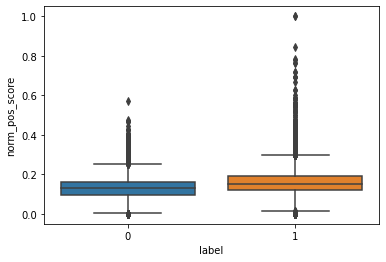

In [21]:
sns.boxplot(x=X_train.label, y=X_train.norm_pos_score)

In [22]:
label_true.norm_pos_score.describe()

count    17141.000000
mean         0.129959
std          0.052232
min          0.000000
25%          0.097315
50%          0.128788
75%          0.160000
max          0.571429
Name: norm_pos_score, dtype: float64

In [23]:
label_fake.norm_pos_score.describe()

count    18777.000000
mean         0.158742
std          0.063750
min          0.000000
25%          0.120690
50%          0.153846
75%          0.190884
max          1.000000
Name: norm_pos_score, dtype: float64

### Negative score

<AxesSubplot:xlabel='label', ylabel='norm_neg_score'>

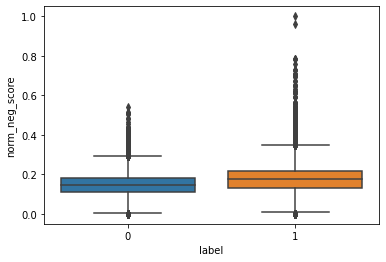

In [24]:
sns.boxplot(x=X_train.label, y=X_train.norm_neg_score)

In [25]:
label_true.norm_neg_score.describe()

count    17141.000000
mean         0.147946
std          0.060527
min          0.000000
25%          0.110032
50%          0.145753
75%          0.182326
max          0.541935
Name: norm_neg_score, dtype: float64

In [26]:
label_fake.norm_neg_score.describe()

count    18777.000000
mean         0.179804
std          0.075332
min          0.000000
25%          0.133234
50%          0.175000
75%          0.219588
max          1.000000
Name: norm_neg_score, dtype: float64

### Objective score

<AxesSubplot:xlabel='label', ylabel='norm_obj_score'>

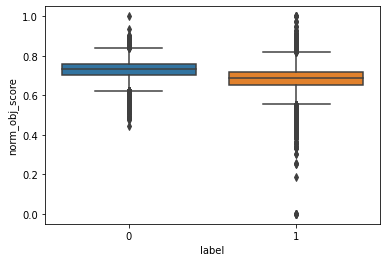

In [27]:
sns.boxplot(x=X_train.label, y=X_train.norm_obj_score)

In [28]:
label_true.norm_obj_score.describe()

count    17141.000000
mean         0.729725
std          0.044943
min          0.446875
25%          0.703947
50%          0.732011
75%          0.758611
max          1.000000
Name: norm_obj_score, dtype: float64

In [29]:
label_fake.norm_obj_score.describe()

count    18777.000000
mean         0.682816
std          0.060825
min          0.000000
25%          0.653646
50%          0.689836
75%          0.720440
max          1.000000
Name: norm_obj_score, dtype: float64

# Weak label using snorkel

In [30]:
ABSTAIN = -1
REAL = 0
FAKE = 1

In [31]:
from snorkel.labeling import labeling_function, LabelingFunction

@labeling_function()
def lf_is_positive(x):
    # Return a label of FAKE if sentiment is positive, otherwise ABSTAIN
    return FAKE if x.norm_pos_score >= 0.19 else ABSTAIN

@labeling_function()
def lf_not_positive(x):
    # Return a label of REAL if sentiment is not positive, otherwise ABSTAIN
    return REAL if x.norm_pos_score < 0.12 else ABSTAIN

@labeling_function()
def lf_is_negative(x):
    # Return a label of FAKE if sentiment is negative, otherwise ABSTAIN
    return FAKE if x.norm_neg_score >= 0.219 else ABSTAIN

@labeling_function()
def lf_not_negative(x):
    # Return a label of REAL if sentiment is not negative, otherwise ABSTAIN
    return REAL if x.norm_neg_score < 0.133 else ABSTAIN

@labeling_function()
def lf_is_objective(x):
    # Return a label of REAL if sentiment is neutral, otherwise ABSTAIN
    return REAL if x.norm_obj_score > 0.758 else ABSTAIN

@labeling_function()
def lf_not_objective(x):
    # Return a label of FAKE if sentiment is not neutral, otherwise ABSTAIN
    return FAKE if x.norm_obj_score < 0.703 else ABSTAIN

In [32]:
from snorkel.labeling import PandasLFApplier

lfs = [lf_is_positive,
       lf_not_positive,
       lf_is_negative,
       lf_not_negative,
       lf_is_objective,
       lf_not_objective
]

applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=X_train)

/home/anja/Projects/tdt13-project/venv/lib/python3.8/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 35918/35918 [00:01<00:00, 20949.02it/s]


In [33]:
from snorkel.labeling import LFAnalysis

LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
lf_is_positive,0,[1],0.184058,0.149284,0.049919
lf_not_positive,1,[0],0.328972,0.267777,0.144301
lf_is_negative,2,[1],0.182833,0.151178,0.047970
lf_not_negative,3,[0],0.324044,0.264519,0.138538
lf_is_objective,4,[0],0.153990,0.121638,0.023526
lf_not_objective,5,[1],0.435492,0.325129,0.189153


In [34]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=2, verbose=True, device='cpu')
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)
preds_train = label_model.predict(L=L_train)

/home/anja/Projects/tdt13-project/venv/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


In [35]:
X_train['weak_label'] = preds_train

In [36]:
from snorkel.labeling import filter_unlabeled_dataframe

labeled_data, weak_labels = filter_unlabeled_dataframe(
    X=X_train, y=preds_train, L=L_train
)

In [37]:
labeled_data

,Unnamed: 0,title,text,subject,date,label,all_words,cleaned,tagged,pos_score,neg_score,obj_score,norm_pos_score,norm_neg_score,norm_obj_score,weak_label
36335,36335,EXPOSED: Facebook Blacklists Conservative News...,21st Century Wire says Censorship is running r...,US_News,"May 10, 2016",1,EXPOSED: Facebook Blacklists Conservative News...,"[exposed, facebook, blacklists, conservative, ...","[(exposed, v), (facebook, a), (blacklists, n),...",0.033333,0.053030,0.756061,0.133333,0.237576,0.756061,1
12384,12384,"FEDS, CA STATE OFFICIALS IGNORED OROVILLE DAM ...","No less to blame are the water agencies, inclu...",politics,"Feb 13, 2017",1,"FEDS, CA STATE OFFICIALS IGNORED OROVILLE DAM ...","[feds, ca, state, officials, ignored, oroville...","[(feds, n), (ca, n), (state, n), (officials, n...",0.031544,0.022834,0.702684,0.126177,0.102298,0.702684,0
24419,24419,This Hidden Camera Footage Reveals A Disturbi...,New footage from a hidden camera reveals that ...,News,"May 5, 2016",1,This Hidden Camera Footage Reveals A Disturbi...,"[hidden, camera, footage, reveals, disturbing,...","[(hidden, a), (camera, n), (footage, n), (reve...",0.035326,0.056522,0.712500,0.141304,0.253217,0.712500,1
24740,24740,DIRTY JOBS’ MIKE ROWE: Great Opportunities Out...,,left-news,"Dec 27, 2016",1,DIRTY JOBS’ MIKE ROWE: Great Opportunities Out...,"[dirty, jobs, mike, rowe, great, opportunities...","[(dirty, n), (jobs, n), (mike, n), (rowe, n), ...",0.045455,0.000000,0.590909,0.181818,0.000000,0.590909,0
27039,27039,CALIFORNIA PIZZA SHOP GETS REAL LIFE LESSON IN...,The bad news for these bleeding heart liberals...,politics,"Aug 24, 2015",1,CALIFORNIA PIZZA SHOP GETS REAL LIFE LESSON IN...,"[california, pizza, shop, gets, real, life, le...","[(california, n), (pizza, n), (shop, n), (gets...",0.035221,0.018646,0.752762,0.140884,0.083536,0.752762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11284,Trump expected to sign cyber security executiv...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"January 30, 2017",0,Trump expected to sign cyber security executiv...,"[trump, expected, sign, cyber, security, execu...","[(trump, n), (expected, v), (sign, a), (cyber,...",0.065789,0.032895,0.760965,0.263158,0.147368,0.760965,0
44732,44732,China minister warns against seduction of valu...,BEIJING (Reuters) - Western countries are tryi...,worldnews,"November 17, 2017",0,China minister warns against seduction of valu...,"[china, minister, warns, seduction, values, we...","[(china, n), (minister, n), (warns, v), (seduc...",0.028539,0.033105,0.764840,0.114155,0.148311,0.764840,0
38158,38158,GREAT! DONALD TRUMP’S CINCINNATI “THANK YOU” S...,VP-ELECT APPEARS FIRST AND THEN AT THE 6 MINUT...,politics,"Dec 1, 2016",1,GREAT! DONALD TRUMP’S CINCINNATI “THANK YOU” S...,"[great, donald, trumps, cincinnati, thank, spe...","[(great, a), (donald, n), (trumps, n), (cincin...",0.006250,0.006250,0.637500,0.025000,0.028000,0.637500,0
860,860,CNN HOST Suggests Women Wear Muslim Headscarf ...,,politics,"Nov 30, 2016",1,CNN HOST Suggests Women Wear Muslim Headscarf ...,"[cnn, host, suggests, women, wear, muslim, hea...","[(cnn, n), (host, n), (suggests, v), (women, n...",0.000000,0.022727,0.795455,0.000000,0.101818,0.795455,0


In [38]:
print(labeled_data[labeled_data.weak_label == 1].shape[0]/labeled_data.shape[0])
print(labeled_data[labeled_data.weak_label == 0].shape[0]/labeled_data.shape[0])

0.45571949865143585
0.5442805013485642


The dataset is balanced

In [39]:
#data.to_csv('snorkel_labeled_all.csv')
labeled_data.to_csv('snorkel_labeled_data.csv')

# Word embeddings

In [40]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [41]:
docs = data.cleaned.apply(lambda words: ' '.join(w for w in words))

In [42]:
t = Tokenizer()
t.fit_on_texts(docs)

In [43]:
vocab_size = len(t.word_index) + 1
vocab_size

231808

In [44]:
encoded_docs = t.texts_to_sequences(docs)
max_length = len(max(encoded_docs, key=len))

In [45]:
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
len(padded_docs)

44898

In [46]:
embeddings_index = dict()
with open('glove.6B/glove.6B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [47]:
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [48]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [49]:
embedding_matrix.shape

(231808, 300)

# Split padded data

In [47]:
X_train_padded = padded_docs[labeled_data.index]

In [48]:
X_test_padded = padded_docs[i_test]

# Save train and test sets

In [49]:
np.savetxt('X_train.csv', X_train_padded, delimiter=',')
np.savetxt('X_test.csv', X_test_padded, delimiter=',')
np.savetxt('y_train.csv', weak_labels, delimiter=',')
np.savetxt('y_test.csv', y_test, delimiter=',')

In [50]:
np.savetxt('embedding_matrix.csv', embedding_matrix, delimiter=',')

# Create, fit and run model

In [2]:
import numpy as np
import pandas as pd

Load training and test set and embedding matrix

In [3]:
X_train_padded = pd.read_csv('X_train.csv', sep=',', header=None)
X_test_padded = pd.read_csv('X_test.csv', sep=',', header=None)
weak_labels = pd.read_csv('y_train.csv', sep=',', header=None)
y_test = pd.read_csv('y_test.csv', sep=',', header=None)

In [4]:
embedding_matrix = pd.read_csv('embedding_matrix.csv', sep=',', header=None)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, SpatialDropout1D, LSTM

In [6]:
vocab_size = embedding_matrix.shape[0]
embed_dim = embedding_matrix.shape[1]
input_length = X_train_padded.shape[1]
lstm_out = 196

In [1]:
model = Sequential()
e = Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length=input_length, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

NameError: name 'Sequential' is not defined

In [ ]:
model.fit(X_train_padded, weak_labels, epochs=10, verbose=1, batch_size=16, validation_split=0.1)

In [11]:
model.save('final_keras_model')

INFO:tensorflow:Assets written to: final_keras_model/assets


In [55]:
loss, accuracy = model.evaluate(X_test_padded, y_test.values, verbose=1)
print('Accuracy: %f' % (accuracy*100), '%')

281/281 [==============================] - 10s 36ms/step - loss: 4.8218 - accuracy: 0.6831
Accuracy: 68.307352 %
